In [105]:
# Import the basic packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let us consider a real-world dataset for Cancer Prediction

In [106]:
# Import the dataset 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

# Assign the features and target to relevent variables
X = cancer.data
y = cancer.target


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [107]:
# Obtain a DataFrame for the cancer dataset
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['diagnosis'] = y
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0        17.99         10.38          122.80     1001.0          0.11840  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry   
0           0.27760          0.3001              0.14710         0.2419  \
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area   
0                 0.07871  ...          17.33           184.60      2019.0  \
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points   
0            0.1622             0.6656           0.7119                0.2654  \
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890          0  
1          0.2750                  0.08902          0  
2          0.3613                  0.08758          0  
3          0.6638                  0.17300          0  
4          0.2364                  0.07678          0  

[5 rows x 31 columns]

In [108]:
# Get the percentage distribution of diagnosis
# normalize = True in the vlaue_counts function, this returns the counts as fractions of the total.
df['diagnosis'].value_counts(normalize=True)

diagnosis
1    0.627417
0    0.372583
Name: proportion, dtype: float64

Here we see that there are 62% diagnosis are for benign cancer and 37% diagnosis are for malignant cancer. Let us obtain a visual plot for the same.

<Axes: xlabel='count', ylabel='diagnosis'>

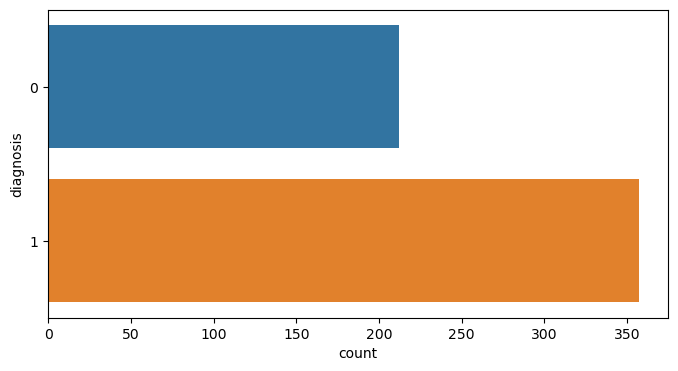

In [109]:
# Obtain a plot for the target label counts
plt.figure(figsize=(8, 4))
sns.countplot(y='diagnosis', data=df)

In [110]:
# Checking for missing/null values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

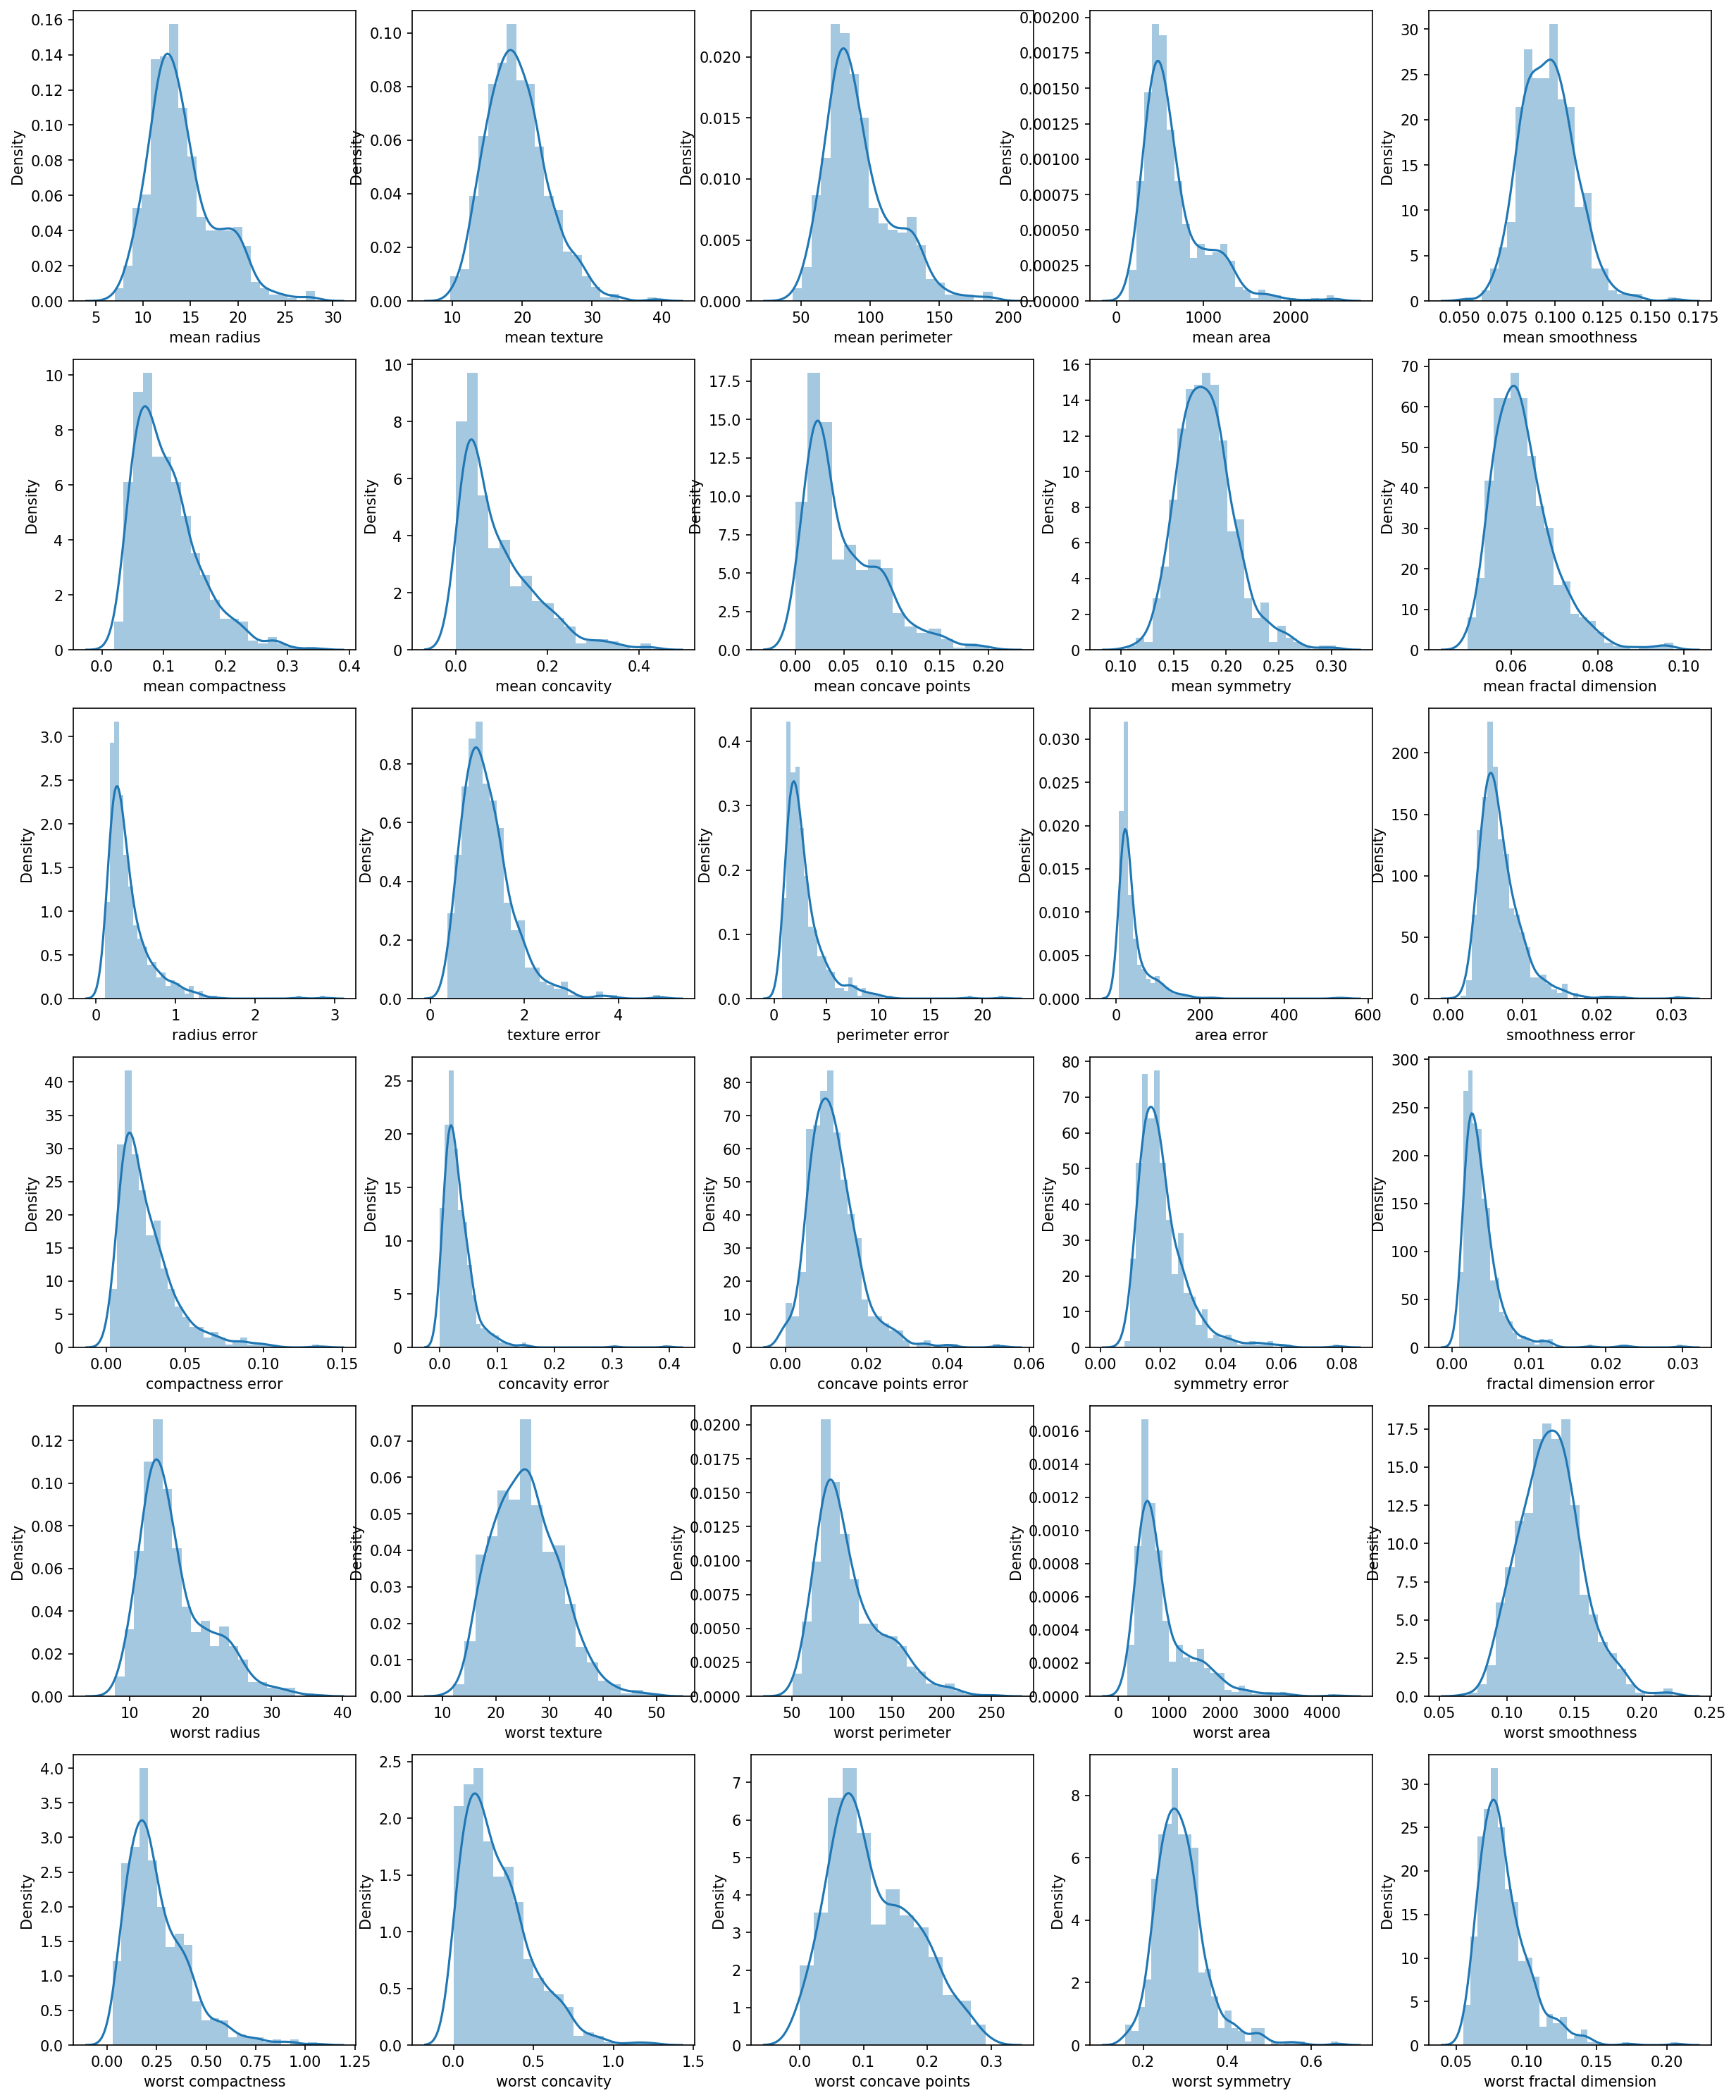

In [111]:
# Check for feature distribution
fig, axis = plt.subplots(nrows = 6, ncols = 5, figsize = (20, 25), dpi = 150)

# For 30 features, create subplot having 6 rows and 5 columns.
count = 0

for i in range(0, 6):
    for j in range(0, 5):
        column = df.iloc[:, count]     # fetching the current column and all rows of that column.
        sns.distplot(column, hist=True, ax = axis[i,j])
        count = count + 1

plt.show()

Some of the features are quite normally distributed. Next, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the variables and plot a heat map.

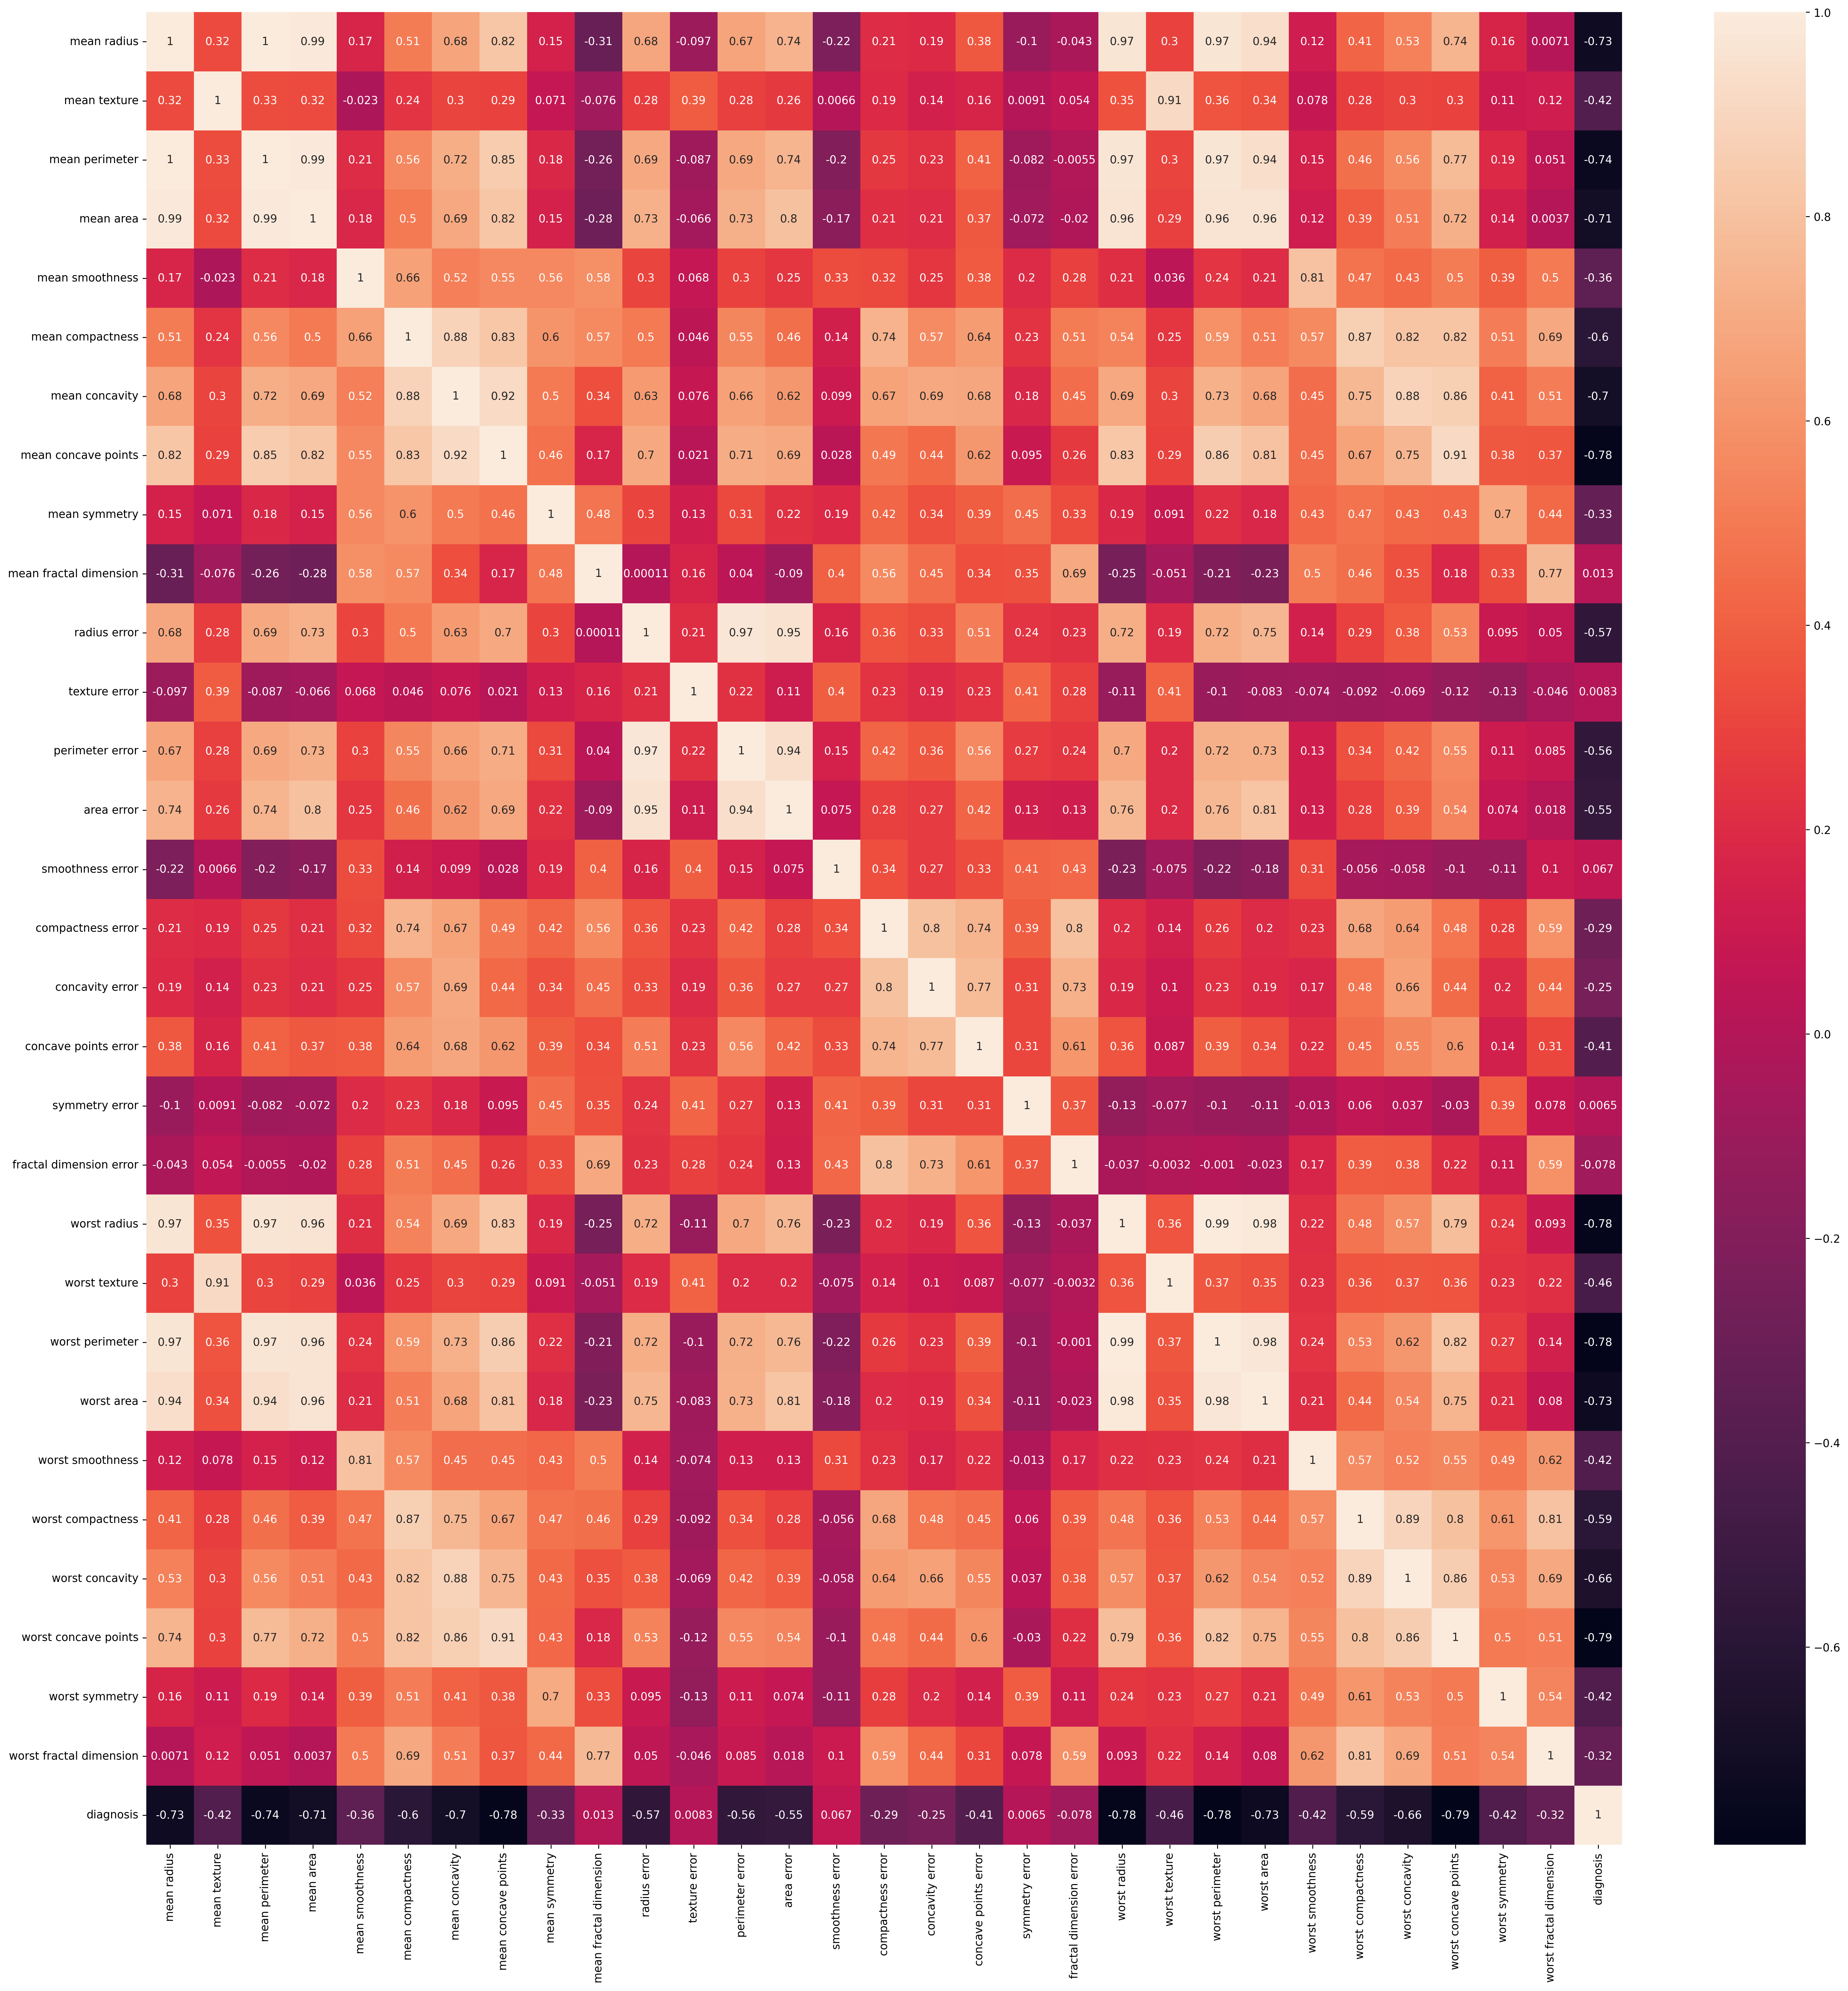

In [112]:
corr_df = df.corr()
plt.figure(figsize = (30, 30), dpi = 250)
sns.heatmap(corr_df, annot = True)
plt.show()

From the correlation heatmap we can infer that some features display strong correlation with the target label. Let us obtain swarmplot for some of the following highly correlated features
1. mean radius
2. mean compactness
3. mean concavity
4. mean concave points
5. worst radius
6. worst concave points

This will help us understand how these datapoints in the features are spread out.The advantage of using swarnplot is that it provides a categorical scatterplot with non-overlapping points.

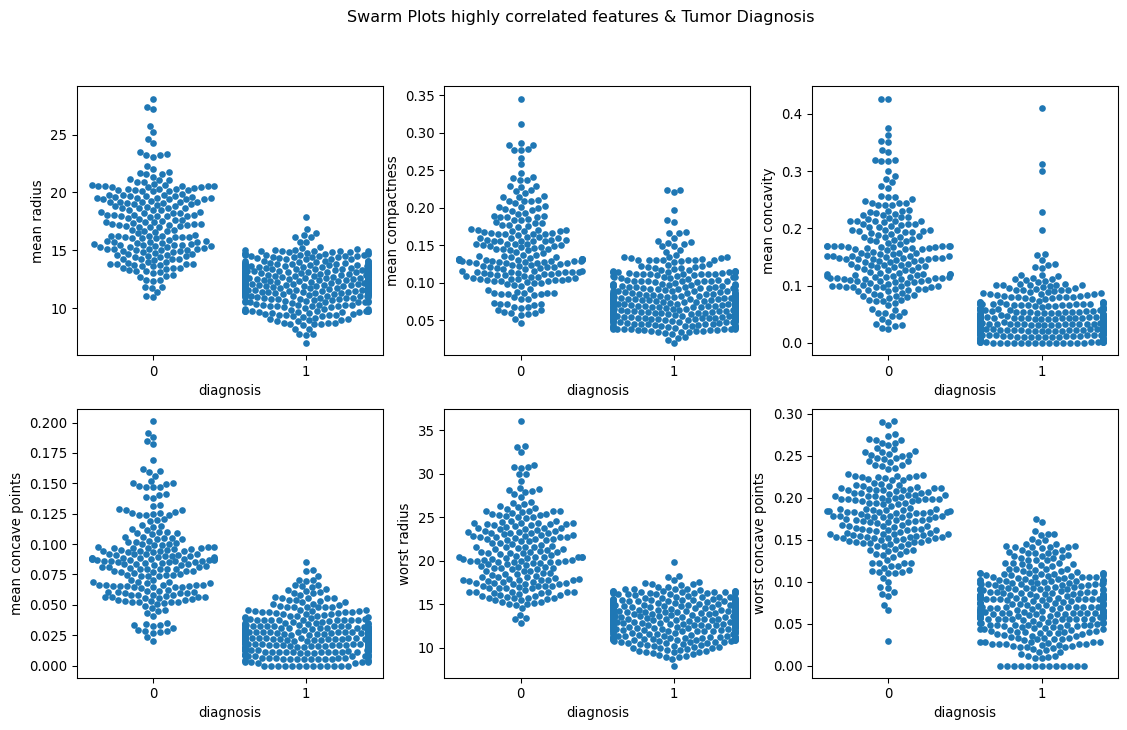

In [113]:
# Swarmplot for highly correlated features vs Tumor diagnosis
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)

# Define the plots
sns.swarmplot(x=df['diagnosis'], y=df['mean radius'], ax = axis[0,0])
sns.swarmplot(x=df['diagnosis'], y=df['mean compactness'], ax = axis[0, 1])
sns.swarmplot(x=df['diagnosis'], y=df['mean concavity'], ax = axis[0, 2])
sns.swarmplot(x=df['diagnosis'], y=df['mean concave points'], ax = axis[1, 0])
sns.swarmplot(x=df['diagnosis'], y=df['worst radius'], ax = axis[1, 1])
sns.swarmplot(x=df['diagnosis'], y=df['worst concave points'], ax = axis[1, 2])
fig.suptitle('Swarm Plots highly correlated features & Tumor Diagnosis')
plt.show()

Based on above plots we can say that the lumos with smaller value of the relevant features can gnerally be classified as benign. However to label the tumor as malignant can be quite complex and will depend on combination of all the features.

Since we now understand the feature distribution let us now proceed with the classifier design.

For classifier model we first need to split the dataset in the train-test sets.


In [114]:
# Import the required package
from sklearn.model_selection import train_test_split

# Obtain separate Dataframes for features and target label respectively
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Perform the train-test split opearation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Verify the shape of the generated datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


# Logistic Regression
To evaluate the classifer performance we will use all the standard metrics.

In [115]:
# Importing required packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay  

Developing A Logistic Regression Model

In [116]:
# Instantiate a logistic regression model
log_model = LogisticRegression()

# Fit the model using train dataset
log_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred = log_model.predict(X_test)

We will compare the perofrmance for all the clasifier models and summarise in the end. For this let us store the performance metrics in a DataFrame and append the performance metrics for each classifier subsequently.

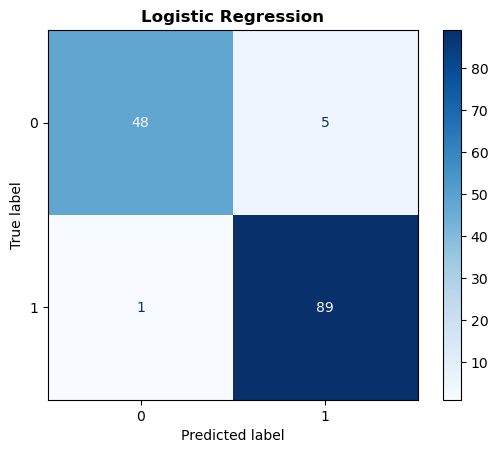

Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.958042   0.946809  0.988889  0.967391

In [117]:
# Define a DataFrame to store the classifier performance metrics
results_df = pd.DataFrame(
    data = [["Logistic Regression", accuracy_score(y_test, y_pred),
             precision_score(y_test, y_pred), recall_score(y_test, y_pred),
            f1_score(y_test, y_pred)]],
    columns = ['Model','Accuracy','Precision','Recall','F1 Score'])

# Save the confusion matrix for the Logistic Regression
cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)

# Customise and display the confusion matrix appearance
disp_log = disp_log.plot(cmap=plt.cm.Blues, values_format='g')
plt.title("Logistic Regression", fontweight="bold")
plt.show()

# Display the performance metric Dataframe
results_df

In [118]:
results_df = results_df.reset_index(drop=True)

The scores seems good and we see that the cases of missclassificatino are quite low.

Let us see the impact of scaling the features for Logistic Regression. For this let us first import the StandardScaler package and transform the features.


In [119]:
# Import the required packages
from sklearn.preprocessing import StandardScaler

# Define the scaler object and transform the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Let us fit the logistic regression model on the scaled features and obtain the performance metric for the model.

We will also append the performance metric to the previously defined DataFrame for future comparison.

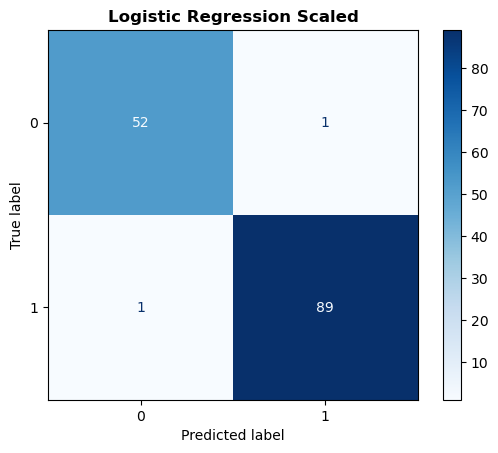

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889

In [120]:
# Fit the model on the scaled features
log_model.fit(X_train_scaled, y_train)

# Obtain the predicted labels for the test dataset
y_pred = log_model.predict(X_test_scaled)

# Store and append the classifier performance metrics to the results DataFrame
lr_scaled_results_df = pd.DataFrame(
    data = [["Logistic Regression Scaled", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
            recall_score(y_test, y_pred), f1_score(y_test, y_pred)]],
    columns = ['Model','Accuracy','Precision','Recall','F1 Score'])

results_df = pd.concat([results_df,lr_scaled_results_df],ignore_index=True)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Logistic Regression Scaled", fontweight='bold')
plt.show()

results_df

Here we observe that the cases of missclassification are further reduced. The performance metric for the scaled logistic regression have been added to the results_df DataFrame. Next, let us explore KNN Classifier

# KNN Classifier

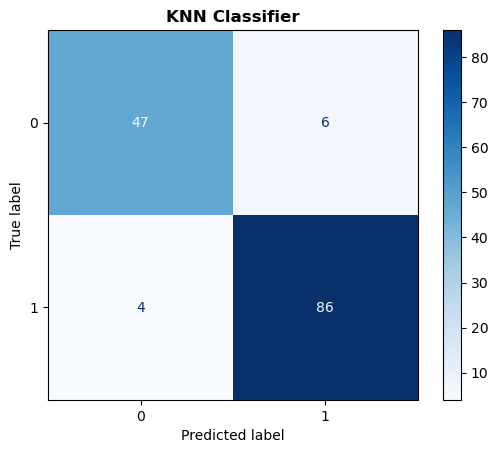

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889
2              KNN Classifier  0.930070   0.934783  0.955556  0.945055

In [121]:
# Import the required package
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()

# Fit the model using train dataset
knn_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred = knn_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
knn_results_df = pd.DataFrame(
    data=[["KNN Classifier", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
          recall_score(y_test, y_pred), f1_score(y_test, y_pred)]],
    columns=['Model', 'Accuracy','Precision','Recall','F1 Score'])

results_df = pd.concat([results_df, knn_results_df],ignore_index=True)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp=disp_knn.plot(cmap=plt.cm.Blues, values_format='g')
plt.title("KNN Classifier", fontweight="bold")
plt.show()

results_df

Here we observe that the number of misclassified cases are more when compared with Logistic Regression.

Now, let us see the impact of scaling the features for KNN classifier


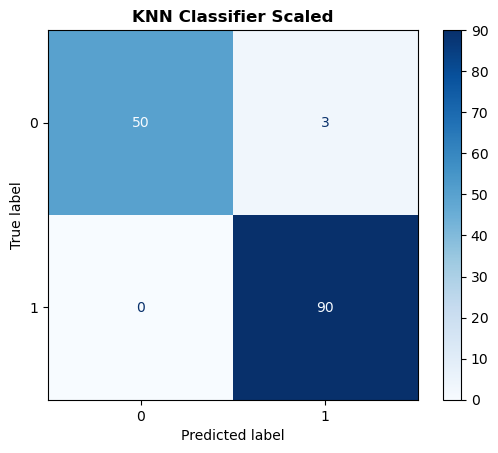

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889
2              KNN Classifier  0.930070   0.934783  0.955556  0.945055
3       KNN Classifier Scaled  0.979021   0.967742  1.000000  0.983607

In [122]:
# Fit the model on the scaled features
knn_model.fit(X_train_scaled, y_train)

# Obtain the predicted labels for the test dataset
y_pred= knn_model.predict(X_test_scaled)

# Store and append the classifier performance metrics to the results DataFrame
knn_scaled_results_df = pd.DataFrame(
    data=[["KNN Classifier Scaled", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = pd.concat([results_df,knn_scaled_results_df], ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("KNN Classifier Scaled", fontweight= "bold")
plt.show()

results_df

Here we observe that the scaling has a visible impact on the perofrmance of the KNN classifier. The number of missclassified cases are reduced.

Next, Let us explore the Support vector Classifier

# Support Vector Classifier

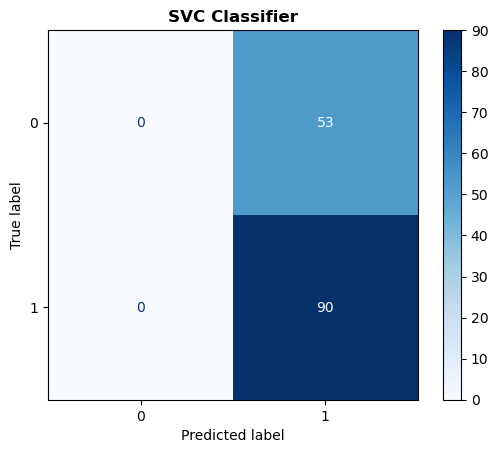

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889
2              KNN Classifier  0.930070   0.934783  0.955556  0.945055
3       KNN Classifier Scaled  0.979021   0.967742  1.000000  0.983607
4              SVC Classifier  0.629371   0.629371  1.000000  0.772532

In [123]:
# Import the required packages
from sklearn.svm import SVC

# Instantiate and fit the Support Classifier Model
svc_model = SVC(gamma=.1).fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred = svc_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
svc_results_df = pd.DataFrame(
    data=[["SVC Classifier", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
           recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = pd.concat([results_df,svc_results_df], ignore_index=True)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC Classifier", fontweight="bold")
plt.show()

results_df


Here we see that the SVC has perofrmed poorly and exhibits highest missclassified cases.

Now, let us see the impact of scaling the features for KNN classifier.


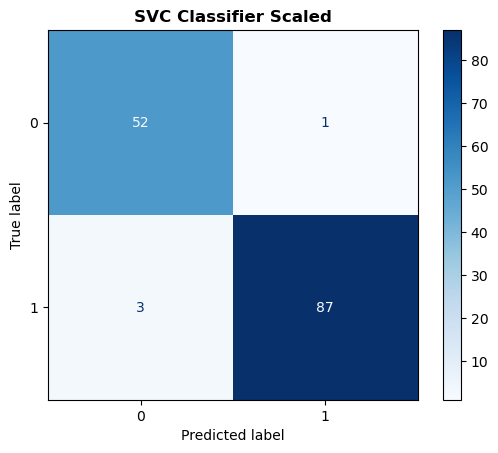

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889
2              KNN Classifier  0.930070   0.934783  0.955556  0.945055
3       KNN Classifier Scaled  0.979021   0.967742  1.000000  0.983607
4              SVC Classifier  0.629371   0.629371  1.000000  0.772532
5                  SVC Scaled  0.972028   0.988636  0.966667  0.977528

In [124]:
# Instantiate and fit the Support Vector Classifier model
svc_model = SVC(gamma=.1).fit(X_train_scaled, y_train)

# Obtain the predicted labels for the test dataset
y_pred= svc_model.predict(X_test_scaled)

# Store and append the classifier performance metrics to the results DataFrame
svc_scaled_results_df = pd.DataFrame(
    data=[["SVC Scaled", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = pd.concat([results_df,svc_scaled_results_df], ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_knn.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC Classifier Scaled", fontweight= "bold")
plt.show()

results_df

Here we observe that SVC is an algorithm which is highly affected by scaling of the features. The misclassified cases have now been reduced drastically.

Next let us explore Decision Trees.

# Decision Tree Classifier

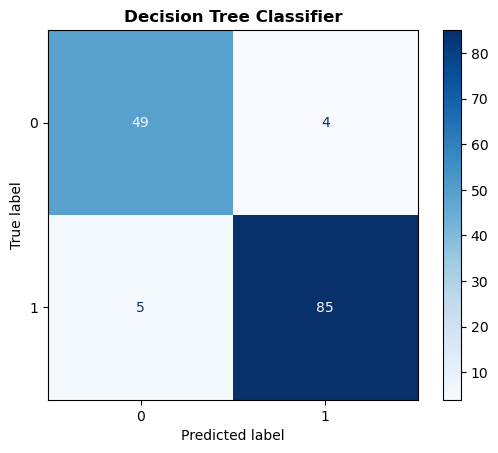

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889
2              KNN Classifier  0.930070   0.934783  0.955556  0.945055
3       KNN Classifier Scaled  0.979021   0.967742  1.000000  0.983607
4              SVC Classifier  0.629371   0.629371  1.000000  0.772532
5                  SVC Scaled  0.972028   0.988636  0.966667  0.977528
6               Decision Tree  0.937063   0.955056  0.944444  0.949721

In [125]:
# Import the required package
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the Classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred = dt_model.predict(X_test)

# Store and append the classifier performance matrix to the results DataFrame
dtree_results_df = pd.DataFrame(
    data=[["Decision Tree", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
           recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = pd.concat([results_df,dtree_results_df], ignore_index=True)

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree Classifier", fontweight= "bold")
plt.show()

results_df

Lets display the decision tree

[Text(0.6794354838709677, 0.9375, 'worst perimeter <= 112.8\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.4879032258064516, 0.8125, 'worst concave points <= 0.146\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.33064516129032256, 0.6875, 'area error <= 42.95\ngini = 0.06\nsamples = 260\nvalue = [8, 252]'),
 Text(0.20967741935483872, 0.5625, 'worst concave points <= 0.136\ngini = 0.031\nsamples = 251\nvalue = [4, 247]'),
 Text(0.12903225806451613, 0.4375, 'smoothness error <= 0.003\ngini = 0.016\nsamples = 245\nvalue = [2, 243]'),
 Text(0.06451612903225806, 0.3125, 'worst texture <= 26.355\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.03225806451612903, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.0967741935483871, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1935483870967742, 0.3125, 'worst texture <= 33.27\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(0.16129032258064516, 0.1875, 'gini = 0.0\nsamples = 222\nvalue 

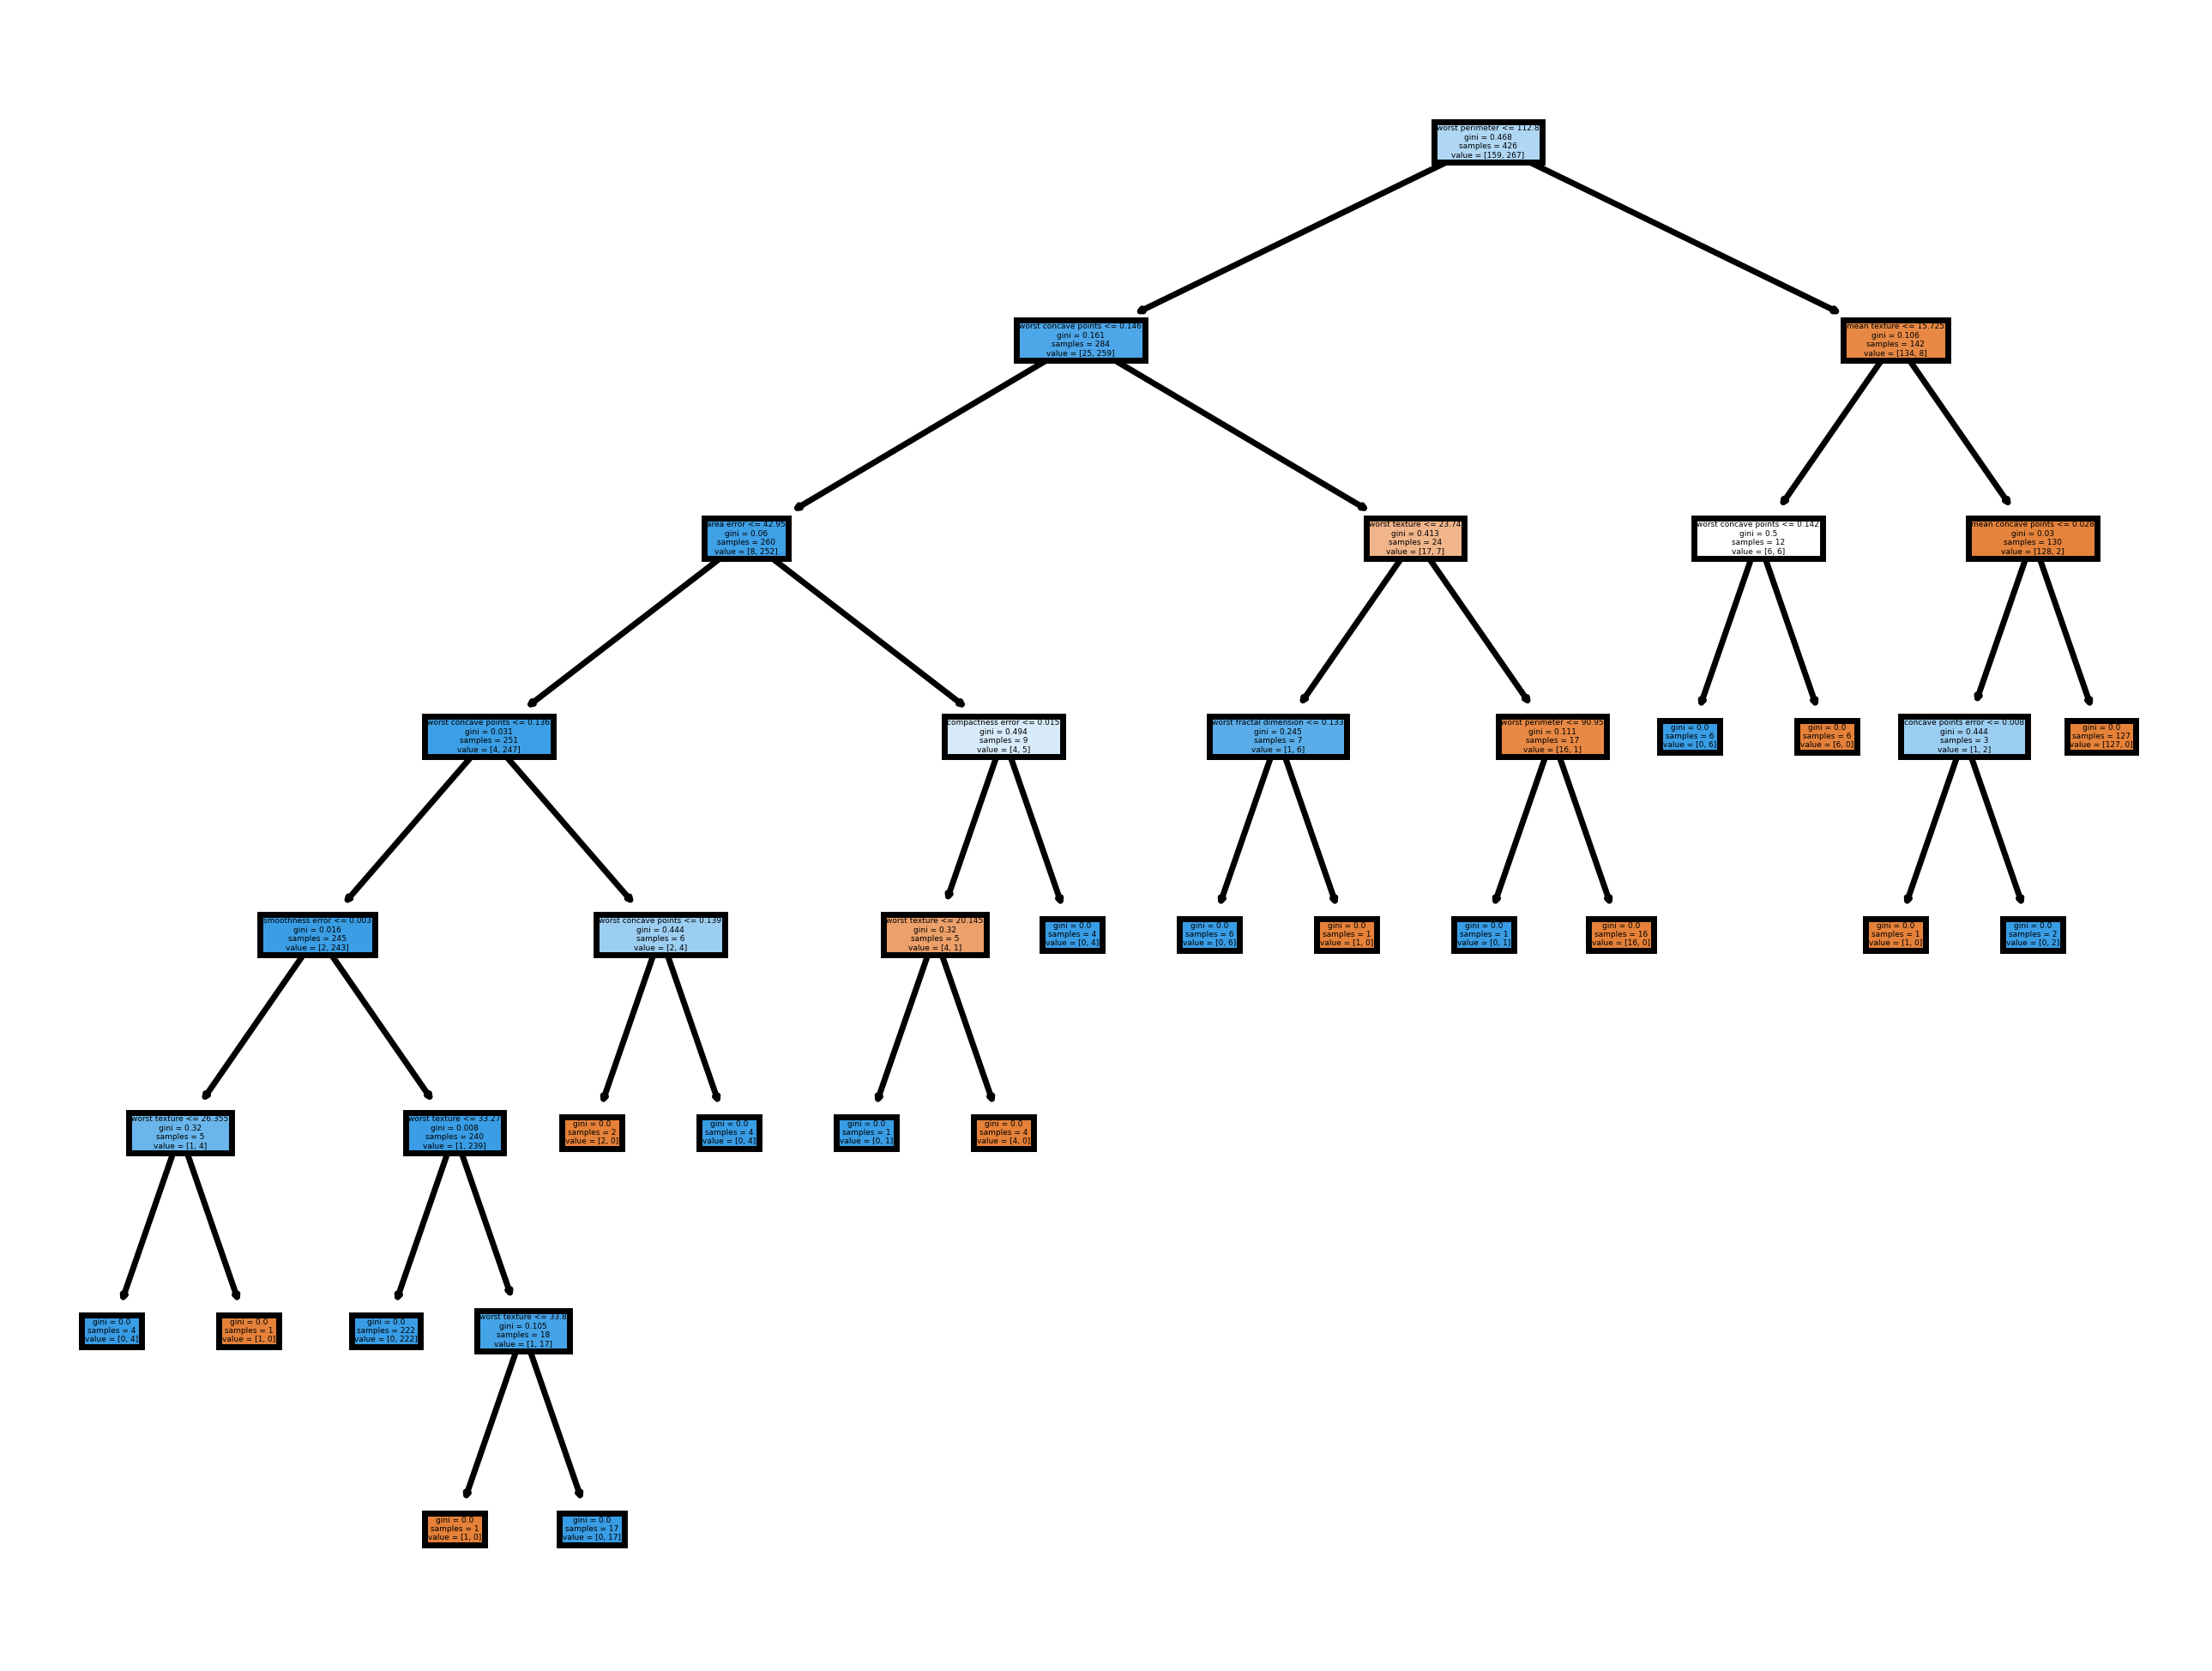

In [126]:
# Import the required packages
from sklearn.tree import plot_tree

# Customize and display the decision tree
plt.figure(dpi=500)
plot_tree(dt_model, feature_names=cancer.feature_names, filled=True)

Here we observe that the depth of the tree is 7. Let us understand the effect of pruning on the performance of a decision tree classifier. 

In [127]:
# Import required package
from sklearn import metrics

# Prune the decision tree based on recall score
depth_recall = []
for i in range(1,10):
    dtree_pruned_clf = DecisionTreeClassifier(max_depth=i)
    dtree_pruned_clf.fit(X_train, y_train)
    dtree_pruned_pred = dtree_pruned_clf.predict(X_test)
    depth_recall.append(metrics.recall_score(y_test, dtree_pruned_pred))
    print("Recall when max_depth = {0} is {1:.3f}".format(i, metrics.recall_score(y_test, dtree_pruned_pred)))

# Obtain the maximum recall score and the corresponding depth
m = max(depth_recall)
print("\n The max recall is {0:.3f} when max_depth = {1}".format(max(depth_recall), [i+1 for i,j in enumerate(depth_recall) if j==m]))


Recall when max_depth = 1 is 0.956
Recall when max_depth = 2 is 0.933
Recall when max_depth = 3 is 0.967
Recall when max_depth = 4 is 0.956
Recall when max_depth = 5 is 0.967
Recall when max_depth = 6 is 0.944
Recall when max_depth = 7 is 0.911
Recall when max_depth = 8 is 0.922
Recall when max_depth = 9 is 0.944

 The max recall is 0.967 when max_depth = [3, 5]


The recall metric indicates that we are getting a good Recall scores for multiple depth parameters. We also observe that by increasing the depth of the tree the overfitting is increasing hence the performance metrics for the test dataset will decrease.

The same pruning process can be followed with other performance metrics as well: accuracy_score, f1_score, precision_score

Let us develop tree for depth = 3 and obtain the respective performance metrics.


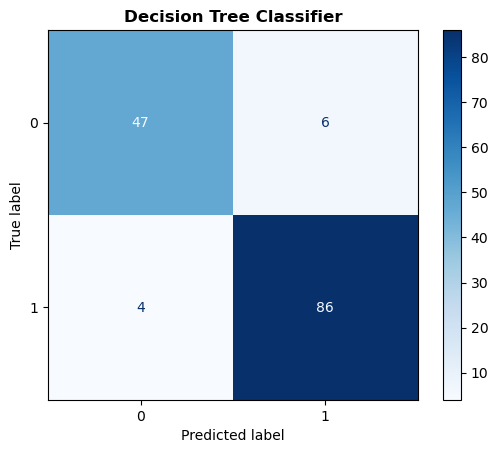

Accuracy: 0.930
Precision: 0.935
Recall: 0.956
F1 Score: 0.945


In [128]:
# Instantiate and fit the Classifier model while specifying the depth parameter as 3
dtree_clf3 = DecisionTreeClassifier(max_depth = 3)
dtree_clf3.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred = dtree_clf3.predict(X_test)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Decision Tree Classifier", fontweight= "bold")
plt.show()

# Display the performance metrics at selected depth
print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))

In a similar way we can build the tree model for other depth values as well.

let's display the pruned decision tree.

[Text(0.5, 0.875, 'worst perimeter <= 112.8\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'worst concave points <= 0.146\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.125, 0.375, 'area error <= 42.95\ngini = 0.06\nsamples = 260\nvalue = [8, 252]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 251\nvalue = [4, 247]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.375, 0.375, 'worst texture <= 23.74\ngini = 0.413\nsamples = 24\nvalue = [17, 7]'),
 Text(0.3125, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.4375, 0.125, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.75, 0.625, 'mean texture <= 15.725\ngini = 0.106\nsamples = 142\nvalue = [134, 8]'),
 Text(0.625, 0.375, 'mean concave points <= 0.067\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.875, 0.375, 'mean con

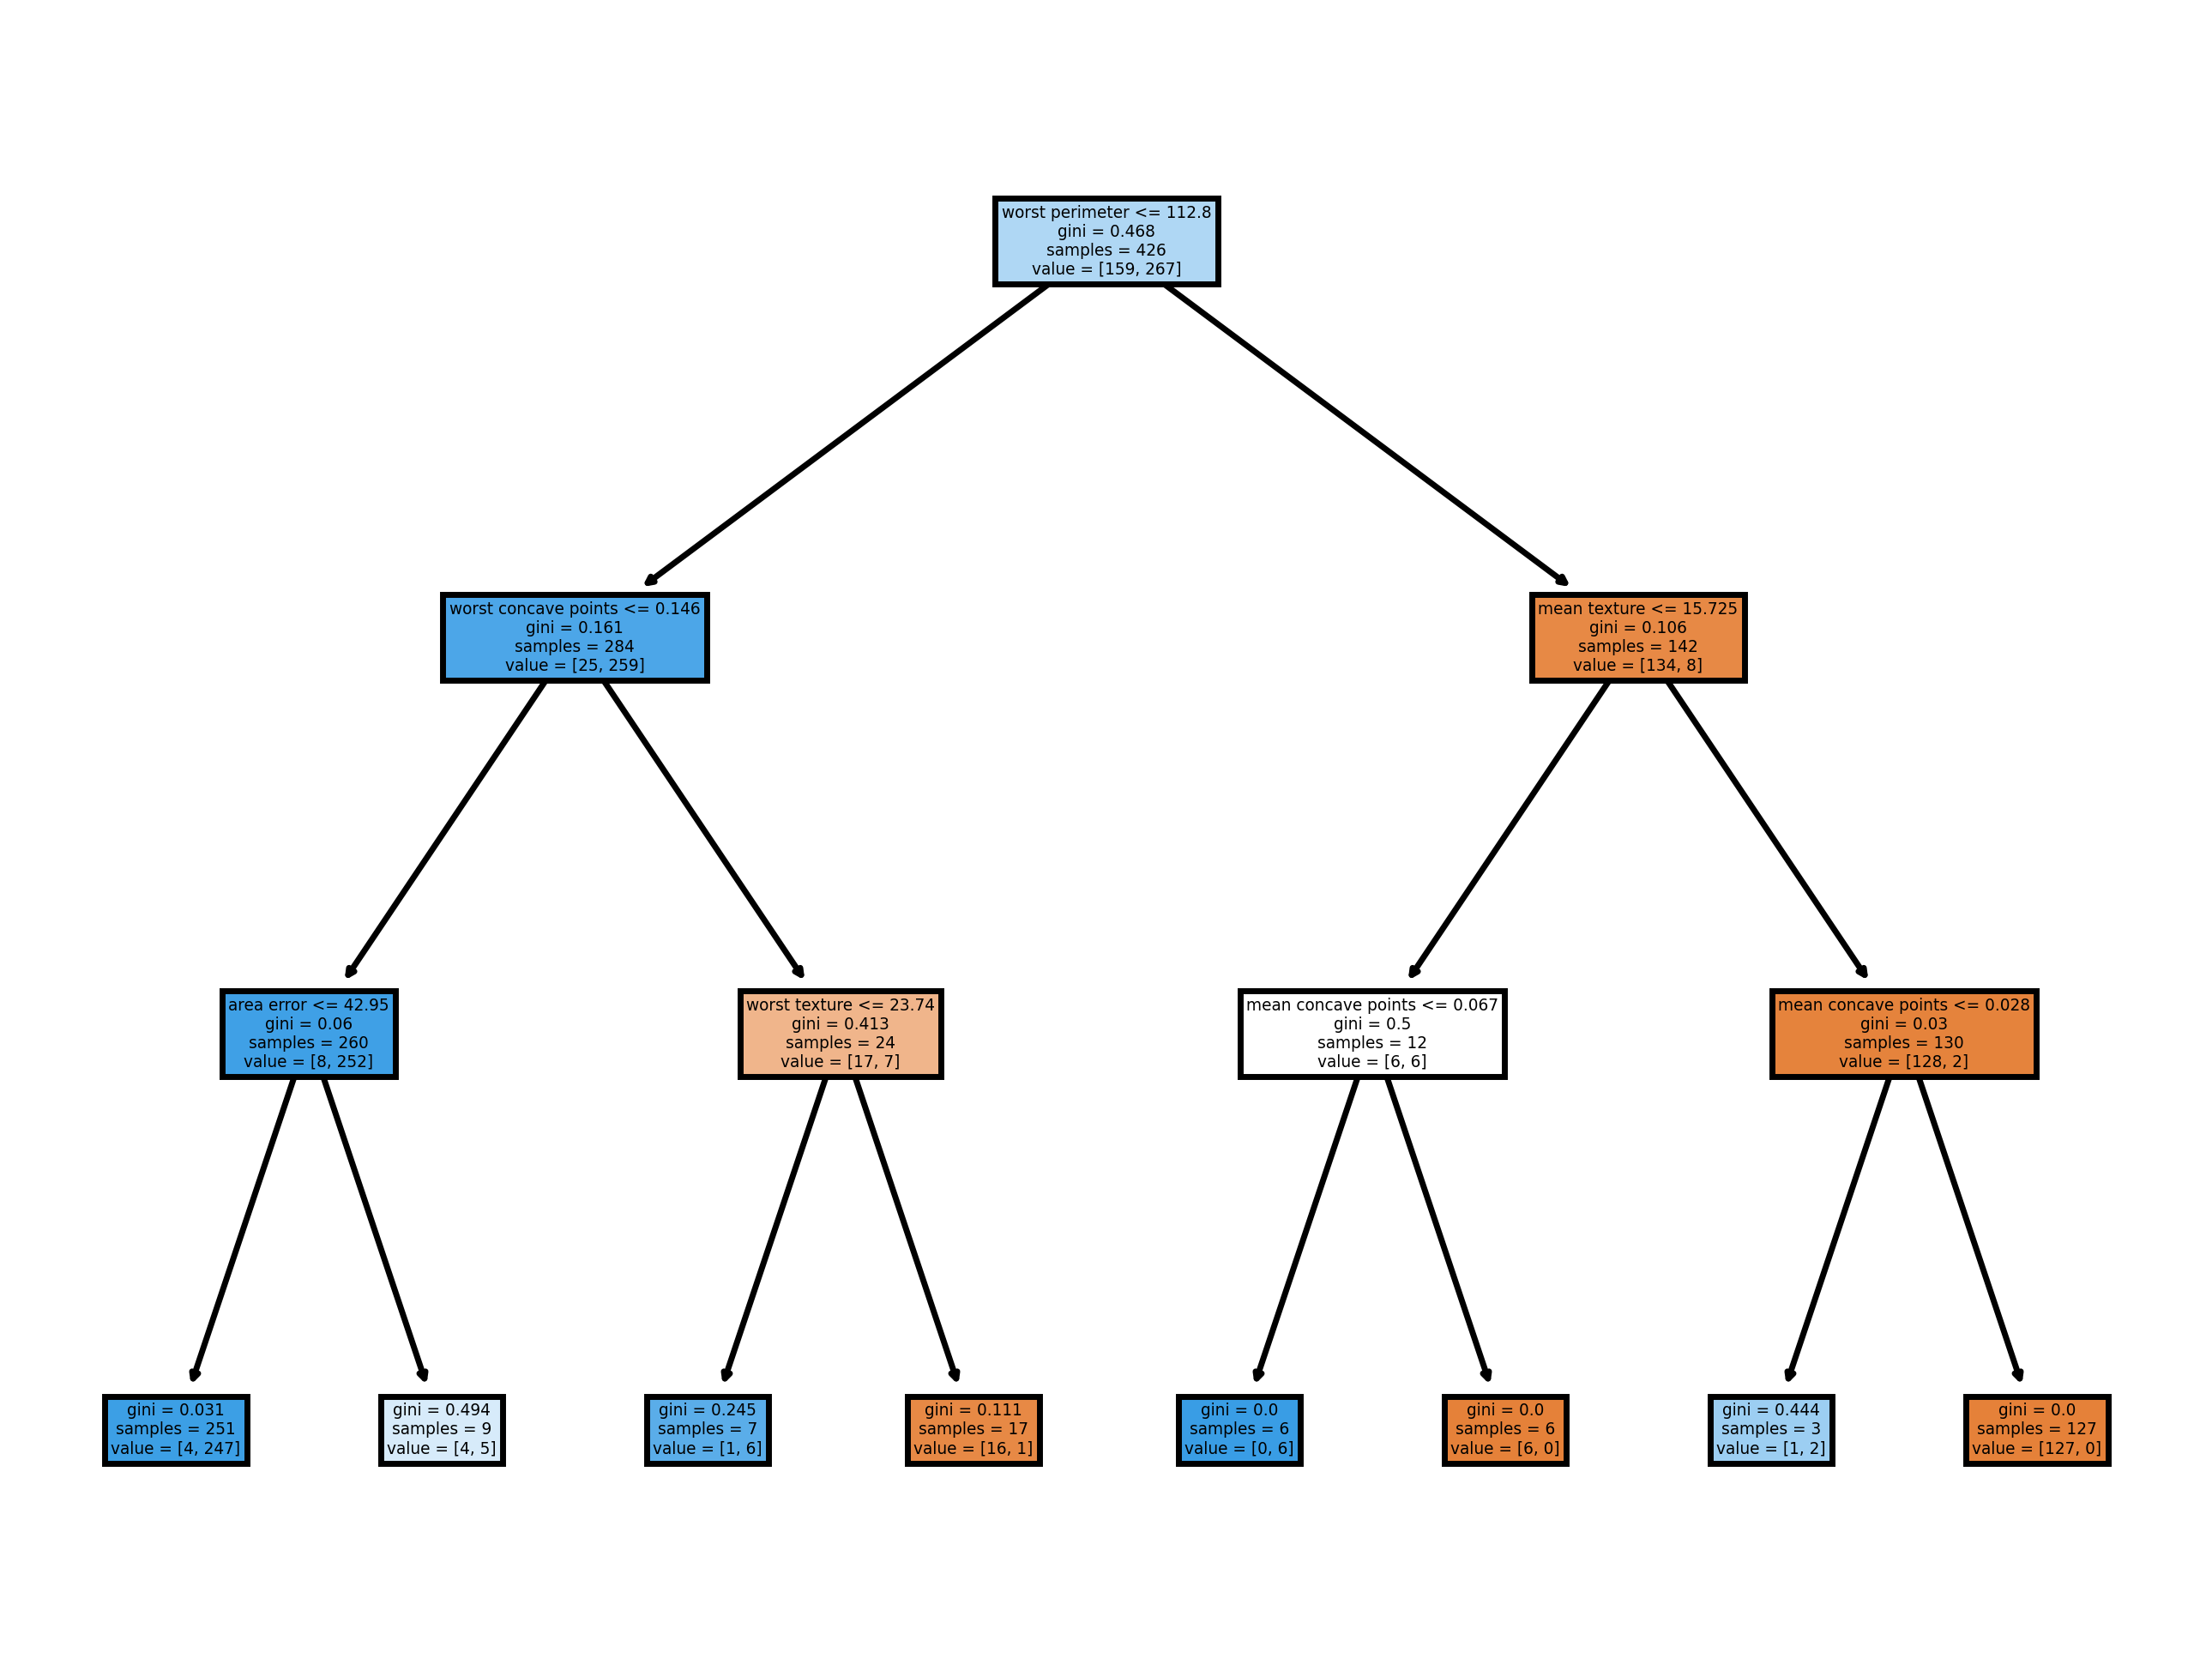

In [129]:
# Customize and display the decision tree
plt.figure(dpi=500)
plot_tree(dtree_clf3, feature_names=cancer.feature_names, filled=True)

Here we observe that the tree model has been pruned at a depth of 3 nodes. We can also see that mojority of leaf nodes are impure.

# Random Forest Classifier

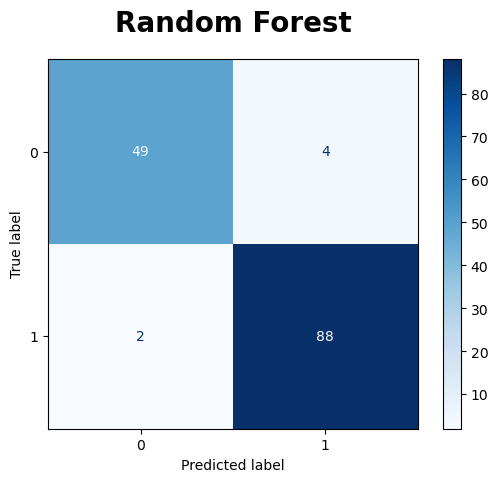

Model  Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  0.958042   0.946809  0.988889  0.967391
1  Logistic Regression Scaled  0.986014   0.988889  0.988889  0.988889
2              KNN Classifier  0.930070   0.934783  0.955556  0.945055
3       KNN Classifier Scaled  0.979021   0.967742  1.000000  0.983607
4              SVC Classifier  0.629371   0.629371  1.000000  0.772532
5                  SVC Scaled  0.972028   0.988636  0.966667  0.977528
6               Decision Tree  0.937063   0.955056  0.944444  0.949721
7               Random Forest  0.958042   0.956522  0.977778  0.967033

In [131]:
# Import the required packacge
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Classifier model
rf_model= RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Obtain the predicted labels for the test dataset
y_pred= rf_model.predict(X_test)

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["Random Forest", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_df = pd.concat([results_df,rf_results_df], ignore_index=True)

# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
disp_rf= ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_rf.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Random Forest", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

results_df

As expected the performance metric scores for the random forest model are better than decision tree. 

Now that we have modeled all the classifieres let us plot the results for the classifiers for visual comparison.

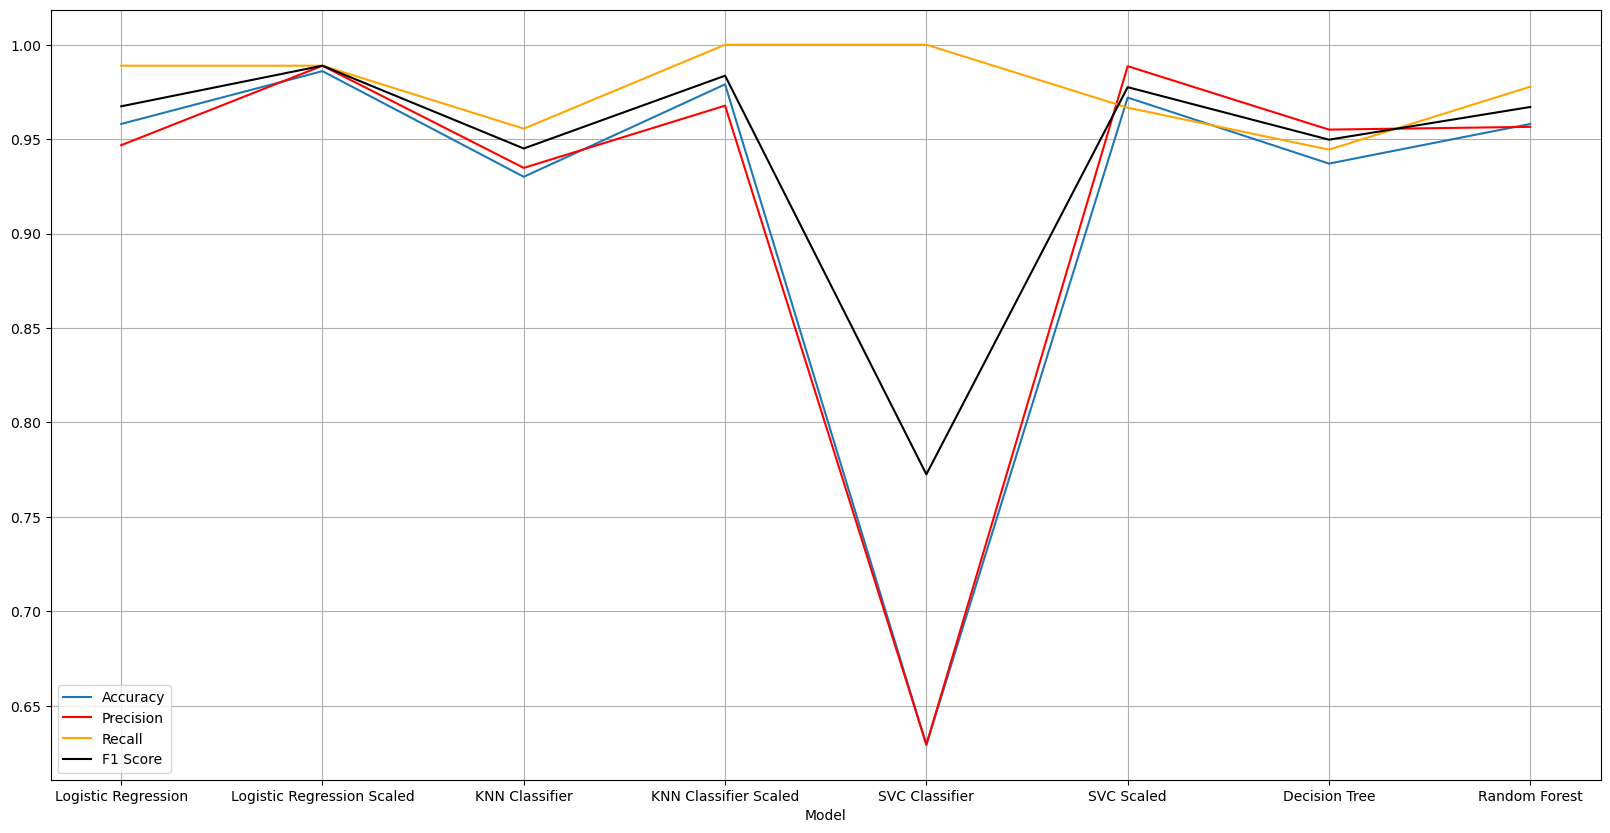

In [132]:
# Define axis object and set the figure size
plt.figure(figsize=(20,10)) 
ax = plt.gca()

# Plot the respective scores and mark the grid
results_df.plot(kind='line',x='Model',y='Accuracy',ax=ax)
results_df.plot(kind='line',x='Model',y='Precision', color='red', ax=ax)
results_df.plot(kind='line',x='Model',y='Recall', color='orange', ax=ax)
results_df.plot(kind='line',x='Model',y='F1 Score', color = 'black' ,ax=ax)
plt.grid()

plt.show()

Here we see that the classifier performance are almost consistent, however Support Vector Classifier exhibits poor performance for unscaled features. Therby, depicting the singificance of scaling.

Since tree based classifiers do not required scaled features (since they work on the principle of entropy and information gain) performance metric for them are obtained bsaed on unscaled data.